# <font color=#415be0><center>Hypothesis Testing on 2020 Presidential Election Poll Data</center></font>
###  <font color=#686a73>*Donald trump government in united states have constantly been under public scrutiny since they started in 2016. With multiple allegations from the opposition, this government has managed to remain in the headlines. Using pre-election poll data from 2016 and after 2016 till date, we will try to understand the opinion and sentiments of voters in few red and blue states.*</font>

### <font color=#4a4c52>Installing required packages</font>

In [1]:
#install.packages("readxl")
#install.packages("tidyverse")
#install.packages("tidyr")
#install.packages("dplyr")
#install.packages("readr")
#install.packages("funModeling")
#install.packages("Hmisc")
#install.packages("sqldf")
#install.packages("reshape2")
#install.packages("sm")

### <font color=#4a4c52>Loading installed packages into workspace

In [42]:
library("readxl")
library("tidyverse")
library("tidyr")
library("dplyr")
library("readr")
library("funModeling")
library("Hmisc")
library("sqldf")
library("reshape2")
library("sm")

## <font color=#304073><u><center>Data preparation & Exploratory data analysis on 2016 election results</center></u></font>

#### Dataset source: 
<a href="https://data.world/garyhoov/2016-pres-election-by-county/file/2016 Presidential Election Analysis.xlsx">County election results 2016</a>

### <font color=#4a4c52>*Import dataset into dataframe and select relevant columns*

In [3]:
# Load 2016 elelction results into dataframe
actual_result_2016 <- read_excel("2016 Presidential Election Analysis.xlsx", sheet="Raw County Election Data")
# Check column names in dataframe
names(actual_result_2016)
# Select required column data into another dataframe
vote_share_2016 <- actual_result_2016[c("State Code",
                                        "County Name",
                                        "Clinton or Trump State",
                                        "Clinton","Trump",
                                        "Total","% Clinton",
                                        "% Trump")]
names(vote_share_2016)  <- c("state_code","county_name","clinton_trump_state",
                             "clinton_votes","trump_votes","total_votes",
                            "cinton_percent","trump_percent")
# Browse a few records
head(vote_share_2016)

[1] "State Code"                                
 [2] "County Name"                               
 [3] "County Population"                         
 [4] "Clinton or Trump State"                    
 [5] "Clinton"                                   
 [6] "Trump"                                     
 [7] "Total"                                     
 [8] "% Clinton"                                 
 [9] "% Trump"                                   
[10] "Vote Difference C-T"                       
[11] "Vote Difference T-C"                       
[12] "Percent Difference C-T"                    
[13] "Percent Difference T-C"                    
[14] "Obama"                                     
[15] "Romney"                                    
[16] "2012 Total Votes"                          
[17] "% Obama"                                   
[18] "% Romney"                                  
[19] "Vote Difference O-R"                       
[20] "% Difference O-R"                          
[21] "Clinton B(W) Obama"                        
[22] "Trump B(W) Romney"                         
[23] "Clinton % B(W) Obama"                      
[24] "Trump % B(W) Romney"                       
[25] "2010 Land Area"                            
[26] "Density"                                   
[27] "Combined FIPS Code"                        
[28] "ANSI Code"                                 
[29] "State FIPS Code"                           
[30] "County FIPS Code"                          
[31] "CBSA Code"                                 
[32] "CSA Code"                                  
[33] "CBSA Title"                                
[34] "CBSA Population"                           
[35] "Metropolitan/Micropolitan Statistical Area"
[36] "CSA Title"                                 
[37] "Metropolitan Division Title"               
[38] "Metropolitan Division Code"                
[39] "Central/Outlying County"

state_code,county_name,clinton_trump_state,clinton_votes,trump_votes,total_votes,cinton_percent,trump_percent
AL,Autauga County,Trump,5908,18110,24661,0.23956855,0.7343579
AL,Baldwin County,Trump,18409,72780,94090,0.19565310,0.7735147
AL,Barbour County,Trump,4848,5431,10390,0.46660250,0.5227141
AL,Bibb County,Trump,1874,6733,8748,0.21422039,0.7696616
AL,Blount County,Trump,2150,22808,25384,0.08469902,0.8985188
AL,Bullock County,Trump,3530,1139,4701,0.75090406,0.2422889


### <font color=#4a4c52>*Review selected columns, datatypes and any missing values*

In [4]:
df_status(vote_share_2016)

             variable q_zeros p_zeros q_na p_na q_inf p_inf      type unique
1          state_code       0       0    0    0     0     0 character     51
2         county_name       0       0    0    0     0     0 character   1848
3 clinton_trump_state       0       0    0    0     0     0 character      2
4       clinton_votes       0       0    0    0     0     0   numeric   2687
5         trump_votes       0       0    0    0     0     0   numeric   2903
6         total_votes       0       0    0    0     0     0   numeric   2963
7      cinton_percent       0       0    0    0     0     0   numeric   3112
8       trump_percent       0       0    0    0     0     0   numeric   3112


### <font color=#4a4c52>*Visually examining any data discrepencies, no missing data was found*

In [5]:
describe(vote_share_2016)

vote_share_2016 

 8  Variables      3113  Observations
--------------------------------------------------------------------------------
state_code 
       n  missing distinct 
    3113        0       51 

lowest : AK AL AR AZ CA, highest: VT WA WI WV WY
--------------------------------------------------------------------------------
county_name 
       n  missing distinct 
    3113        0     1848 

lowest : Abbeville County Acadia Parish    Accomack County  Ada County       Adair County    
highest: Yuba County      Yuma County      Zapata County    Zavala County    Ziebach County  
--------------------------------------------------------------------------------
clinton_trump_state 
       n  missing distinct 
    3113        0        2 
                          
Value      Clinton   Trump
Frequency      751    2362
Proportion   0.241   0.759
--------------------------------------------------------------------------------
clinton_votes 
       n  missing distinct     Info     Mean

### <font color=#4a4c52>*Comparing number of states won by republicans and democrats in 2016*

candidate,state_won
Clinton,21
Trump,30


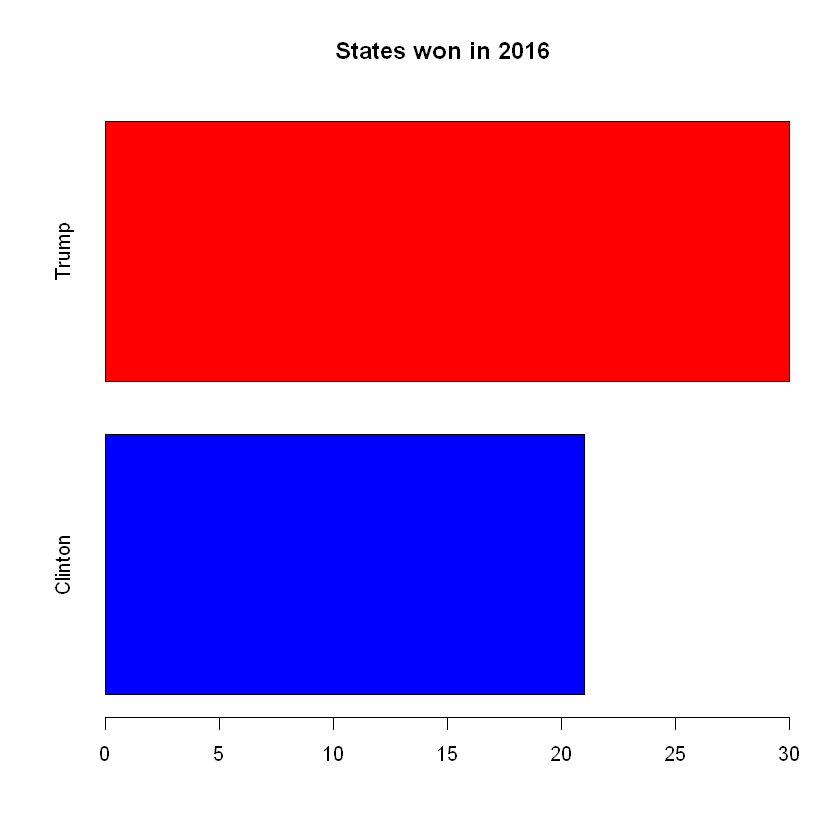

In [6]:
stateWinner  <- unique(vote_share_2016[c("state_code","clinton_trump_state")])
stateFreq  <- as.data.frame(table(stateWinner$clinton_trump_state))
names(stateFreq)  <- c("candidate","state_won")
stateFreq
barplot(stateFreq$state_won, main = "States won in 2016",
        names.arg = stateFreq$candidate, 
        col = c("blue", "red"), 
        horiz = TRUE)

### <font color=#4a4c52>*Checking for any duplicate counties*

In [7]:

countyFreq  <- table(vote_share_2016$county_name)
countyFreq[countyFreq > 1]


         Adair County          Adams County         Albany County 
                    4                    12                     2 
     Alexander County       Allegany County      Alleghany County 
                    2                     2                     2 
         Allen County       Anderson County      Armstrong County 
                    4                     5                     2 
       Ashland County       Atchison County          Baker County 
                    2                     2                     3 
       Baldwin County        Barbour County          Barry County 
                    2                     2                     2 
        Barton County           Bath County            Bay County 
                    2                     2                     2 
      Beaufort County         Beaver County        Bedford County 
                    2                     3                     3 
          Bell County         Benton County       Berkeley Co

In [8]:
# Since two different states can have same county names, lets check if we have duplicate records for counties in same state
countyStateFreq  <- as.data.frame(table(vote_share_2016[c("state_code","county_name")]))
countyStateFreq[countyStateFreq$Freq > 1, ]

state_code,county_name,Freq


### <font color=#4a4c52>*Since we will be analysing statewise and not by county wise, lets determine the vote share per state*

In [9]:
voteShareByState <- aggregate(vote_share_2016[c("clinton_votes", "trump_votes", "total_votes")], 
          by = list(vote_share_2016$state_code, vote_share_2016$clinton_trump_state), 
          FUN = sum)
names(voteShareByState) <- c("state_code","clinton_trump_state",
                "clinton_votes","trump_votes","total_votes")
voteShareByState["trump_share"] = round(voteShareByState$trump_votes/voteShareByState$total_votes, 2)
voteShareByState["clinton_share"] = 1 - voteShareByState$trump_share
head(voteShareByState)

state_code,clinton_trump_state,clinton_votes,trump_votes,total_votes,trump_share,clinton_share
CA,Clinton,7230699,3841134,11733523,0.33,0.67
CO,Clinton,1212209,1137455,2564185,0.44,0.56
CT,Clinton,884432,668266,1623542,0.41,0.59
DC,Clinton,260223,11553,280272,0.04,0.96
DE,Clinton,235581,185103,441535,0.42,0.58
HI,Clinton,266827,128815,428825,0.30,0.70


### <font color=#4a4c52>*Adding a new row for total vote share across all counties in US*

In [10]:
voteShareByState <- voteShareByState %>%
    add_row(state_code = "US", 
            clinton_trump_state = "Trump", 
            clinton_votes = sum(voteShareByState$clinton_votes), 
            trump_votes = sum(voteShareByState$trump_votes), 
            total_votes = sum(voteShareByState$total_votes), 
            trump_share = round(sum(voteShareByState$trump_votes)/sum(voteShareByState$total_votes), 2),
            clinton_share = 1 - round(sum(voteShareByState$trump_votes)/sum(voteShareByState$total_votes), 2))

In [11]:
head(voteShareByState)

state_code,clinton_trump_state,clinton_votes,trump_votes,total_votes,trump_share,clinton_share
CA,Clinton,7230699,3841134,11733523,0.33,0.67
CO,Clinton,1212209,1137455,2564185,0.44,0.56
CT,Clinton,884432,668266,1623542,0.41,0.59
DC,Clinton,260223,11553,280272,0.04,0.96
DE,Clinton,235581,185103,441535,0.42,0.58
HI,Clinton,266827,128815,428825,0.30,0.70


### <font color=#4a4c52>*Visualizing density distribution for county vote share for republicans and democrats*

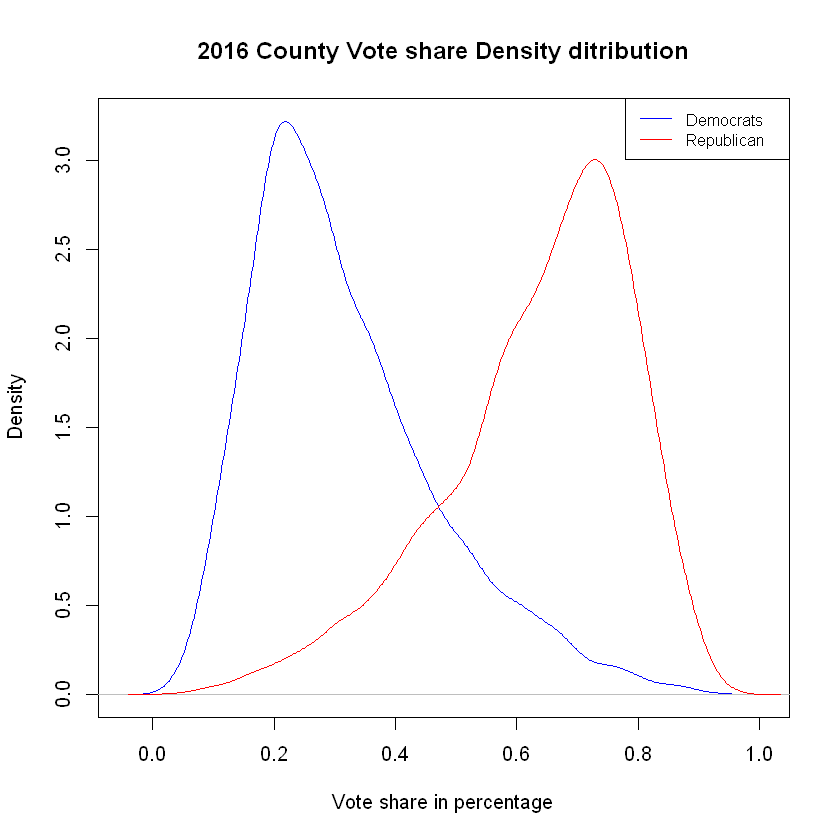

In [12]:
plot(density(vote_share_2016$cinton_percent), col = "blue", xlab = "Vote share in percentage", 
     main = "2016 County Vote share Density ditribution")
lines(density(vote_share_2016$trump_percent), col = "red")
legend("topright", legend=c("Democrats", "Republican"),
       col=c("blue", "red"), lty=1:1, cex=0.8)

### <font color=#4a4c52>*Visualizing density distribution for state-wise vote share for republicans and democrats*

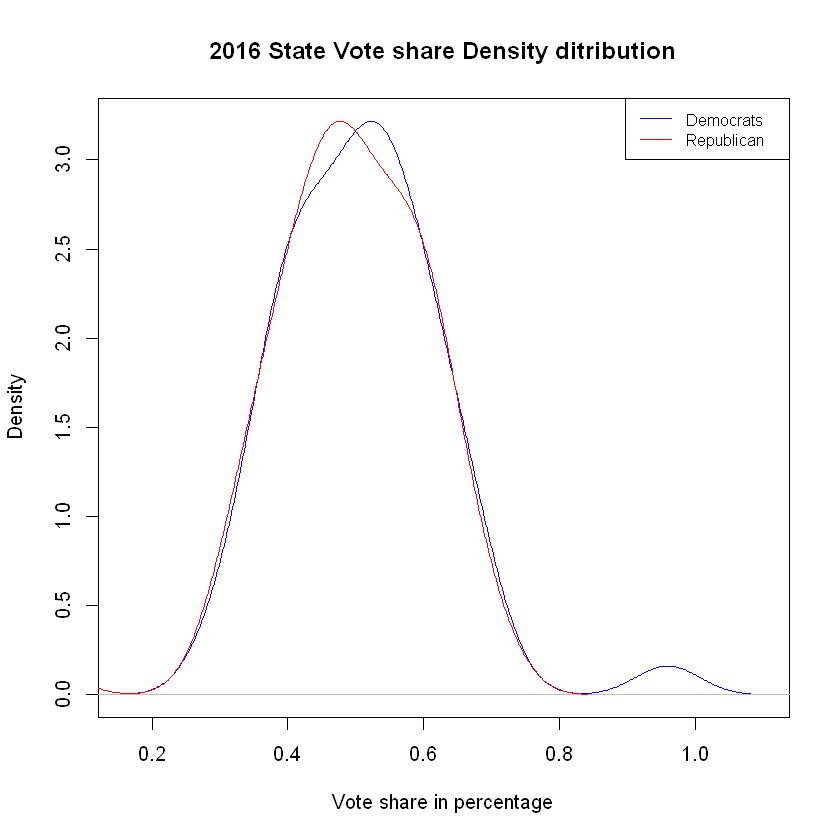

In [13]:
plot(density(voteShareByState$clinton_share), col = "blue", 
     xlab = "Vote share in percentage", 
     main = "2016 State Vote share Density ditribution")
lines(density(voteShareByState$trump_share), col = "red")

legend("topright", legend=c("Democrats", "Republican"),
       col=c("blue", "red"), lty=1:1, cex=0.8)

## <font color=#304073><u><center>Data preparation & Exploratory data analysis on 2016 election poll data</center></u></font>

### <font color=#4a4c52>*Importing 2016 polls data*

In [14]:
polls2016 <- read.csv("president_general_polls_2016.csv", header = TRUE, sep = ",")

### <font color=#4a4c52>*Selecting only relevant columns*

In [15]:
names(polls2016)
polls2016  <- polls2016[c("state", "pollster", "adjpoll_clinton", "adjpoll_trump")]
head(polls2016)

[1] "cycle"            "branch"           "type"             "matchup"         
 [5] "forecastdate"     "state"            "startdate"        "enddate"         
 [9] "pollster"         "grade"            "samplesize"       "population"      
[13] "poll_wt"          "rawpoll_clinton"  "rawpoll_trump"    "rawpoll_johnson" 
[17] "rawpoll_mcmullin" "adjpoll_clinton"  "adjpoll_trump"    "adjpoll_johnson" 
[21] "adjpoll_mcmullin" "multiversions"    "url"              "poll_id"         
[25] "question_id"      "createddate"      "timestamp"

state,pollster,adjpoll_clinton,adjpoll_trump
U.S.,ABC News/Washington Post,45.20163,41.72430
U.S.,Google Consumer Surveys,43.34557,41.21439
U.S.,Ipsos,42.02638,38.81620
U.S.,YouGov,45.65676,40.92004
U.S.,Gravis Marketing,46.84089,42.33184
U.S.,Fox News/Anderson Robbins Research/Shaw & Company Research,49.02208,43.95631


### <font color=#4a4c52>*Populating a new column for state code and checking for any missing data*

In [16]:
# Adding a new column for state code
polls2016$state_code  <- state.abb[match(polls2016$state, state.name)]
# Validating count of state codes in order to check for any missing data
describe(polls2016$state_code)

polls2016$state_code 
       n  missing distinct 
    9141     3483       50 

lowest : AK AL AR AZ CA, highest: VT WA WI WV WY

In [17]:
missingStateCode <- polls2016[c("state","state_code")] %>%
                                filter_all(any_vars(is.na(.)))
missingStateCodeFreq <- as.data.frame(table(missingStateCode$state))
missingStateCodeFreq[missingStateCodeFreq$Freq > 1, ]

,Var1,Freq
9,District of Columbia,78
21,Maine CD-1,33
22,Maine CD-2,42
31,Nebraska CD-1,3
32,Nebraska CD-2,6
33,Nebraska CD-3,3
50,U.S.,3318


In [18]:
# Replacing state names with appropriate state code
polls2016$state_code[polls2016$state == "U.S."]  <- "US"
polls2016$state_code[polls2016$state == "District of Columbia"]  <- "DC"
polls2016$state_code[polls2016$state == "Maine CD-1"]  <- "ME"
polls2016$state_code[polls2016$state == "Maine CD-2"]  <- "ME"
polls2016$state_code[polls2016$state == "Nebraska CD-1"]  <- "NE"
polls2016$state_code[polls2016$state == "Nebraska CD-2"]  <- "NE"
polls2016$state_code[polls2016$state == "Nebraska CD-3"]  <- "NE"
describe(polls2016$state_code)

polls2016$state_code 
       n  missing distinct 
   12624        0       52 

lowest : AK AL AR AZ CA, highest: VT WA WI WV WY

### <font color=#4a4c52>*Populating a new column for winning candidate in each state*

In [19]:
polls2016$state_code <- trimws(polls2016$state_code)
voteShareByState$state_code <- trimws(voteShareByState$state_code)
polls2016$winner  <- voteShareByState$clinton_trump_state[match(polls2016$state_code, voteShareByState$state_code)]
head(polls2016)

state,pollster,adjpoll_clinton,adjpoll_trump,state_code,winner
U.S.,ABC News/Washington Post,45.20163,41.72430,US,Trump
U.S.,Google Consumer Surveys,43.34557,41.21439,US,Trump
U.S.,Ipsos,42.02638,38.81620,US,Trump
U.S.,YouGov,45.65676,40.92004,US,Trump
U.S.,Gravis Marketing,46.84089,42.33184,US,Trump
U.S.,Fox News/Anderson Robbins Research/Shaw & Company Research,49.02208,43.95631,US,Trump


### <font color=#4a4c52>*Populating a new column for winning part and its vote percentage in each state*

In [20]:
polls2016$winner_party <- ifelse(polls2016$winner == "Trump",
                                        "REP",
                                        "DEM")
polls2016$winner_per <- ifelse(polls2016$winner == "Trump",
                                        polls2016$adjpoll_trump,
                                        polls2016$adjpoll_clinton)
head(polls2016)

state,pollster,adjpoll_clinton,adjpoll_trump,state_code,winner,winner_party,winner_per
U.S.,ABC News/Washington Post,45.20163,41.72430,US,Trump,REP,41.72430
U.S.,Google Consumer Surveys,43.34557,41.21439,US,Trump,REP,41.21439
U.S.,Ipsos,42.02638,38.81620,US,Trump,REP,38.81620
U.S.,YouGov,45.65676,40.92004,US,Trump,REP,40.92004
U.S.,Gravis Marketing,46.84089,42.33184,US,Trump,REP,42.33184
U.S.,Fox News/Anderson Robbins Research/Shaw & Company Research,49.02208,43.95631,US,Trump,REP,43.95631


In [21]:
describe(polls2016$winner)
describe(polls2016$winner_party)
describe(polls2016$winner_per)

polls2016$winner 
       n  missing distinct 
   12624        0        2 
                          
Value      Clinton   Trump
Frequency     3618    9006
Proportion   0.287   0.713

polls2016$winner_party 
       n  missing distinct 
   12624        0        2 
                      
Value        DEM   REP
Frequency   3618  9006
Proportion 0.287 0.713

polls2016$winner_per 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12624        0    12579        1    46.09     6.66    37.16    39.25 
     .25      .50      .75      .90      .95 
   42.28    45.17    49.48    53.86    56.94 

lowest : 27.68761 27.71060 27.82165 29.71276 29.72806
highest: 86.70870 86.71320 86.72195 86.76118 86.77218

### <font color=#4a4c52>*Visualizing density distribution for state-wise vote share for republicans and democrats in 2016 polls*

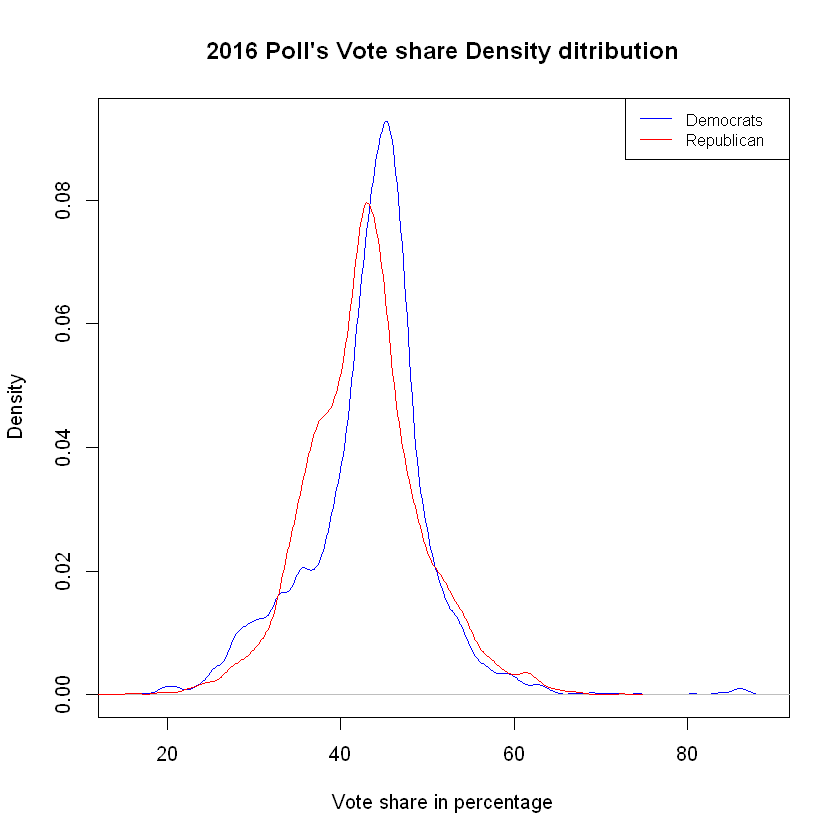

In [22]:
plot(density(polls2016$adjpoll_clinton), col = "blue", xlab = "Vote share in percentage", 
     main = "2016 Poll's Vote share Density ditribution")
lines(density(polls2016$adjpoll_trump), col = "red")
legend("topright", legend=c("Democrats", "Republican"),
       col=c("blue", "red"), lty=1:1, cex=0.8)

## <font color=#304073><u><center>Data preparation & Exploratory data analysis on current election poll data</center></u></font>

### <font color=#4a4c52>*Loading dataset into dataframe and selecting relevant columns*

In [23]:
# Load presidential polls results from csv into dataframe
polls <- read.csv("president_polls.csv", header = TRUE, sep = ",")

# Select relevant columns.
polls_2020 <- polls[c("question_id",
                      "state",
                      "pollster_id",
                      "pollster",
                      "sample_size",
                      "population",
                      "methodology",
                      "created_at",
                      "answer",
                      "candidate_name",
                      "candidate_party",
                      "pct")]

# Browse top 5 records
head(polls_2020)

question_id,state,pollster_id,pollster,sample_size,population,methodology,created_at,answer,candidate_name,candidate_party,pct
113225,New Hampshire,446,St. Anselm,512,rv,Live Phone,11/19/2019 17:41,Biden,Joseph R. Biden Jr.,DEM,51
113225,New Hampshire,446,St. Anselm,512,rv,Live Phone,11/19/2019 17:41,Trump,Donald Trump,REP,43
113226,New Hampshire,446,St. Anselm,512,rv,Live Phone,11/19/2019 17:42,Buttigieg,Pete Buttigieg,DEM,49
113226,New Hampshire,446,St. Anselm,512,rv,Live Phone,11/19/2019 17:42,Trump,Donald Trump,REP,42
113227,New Hampshire,446,St. Anselm,512,rv,Live Phone,11/19/2019 17:42,Sanders,Bernard Sanders,DEM,49
113227,New Hampshire,446,St. Anselm,512,rv,Live Phone,11/19/2019 17:42,Trump,Donald Trump,REP,46


### <font color=#4a4c52>*Excluding any data besides republican and democrat polls*

In [24]:
describe(polls_2020$candidate_party)

polls_2020$candidate_party 
       n  missing distinct 
    2299        0        3 
                            
Value        DEM   LIB   REP
Frequency   1160     9  1130
Proportion 0.505 0.004 0.492

In [25]:
polls_2020 <- polls_2020 %>%
                filter(candidate_party != "LIB") %>%
                group_by(question_id, state, pollster, candidate_party) %>%
                    summarise(per_share = sum(pct))
head(polls_2020)

question_id,state,pollster,candidate_party,per_share
92078,,Rasmussen Reports/Pulse Opinion Research,DEM,50
92078,,Rasmussen Reports/Pulse Opinion Research,REP,43
92079,Ohio,Public Policy Polling,DEM,48
92079,Ohio,Public Policy Polling,REP,42
92080,Ohio,Public Policy Polling,DEM,48
92080,Ohio,Public Policy Polling,REP,44


### <font color=#4a4c52>*Replacing blanks in state column with US*

In [26]:
polls_2020$state <- sub("^$", "US", polls_2020$state)
head(polls_2020)

question_id,state,pollster,candidate_party,per_share
92078,US,Rasmussen Reports/Pulse Opinion Research,DEM,50
92078,US,Rasmussen Reports/Pulse Opinion Research,REP,43
92079,Ohio,Public Policy Polling,DEM,48
92079,Ohio,Public Policy Polling,REP,42
92080,Ohio,Public Policy Polling,DEM,48
92080,Ohio,Public Policy Polling,REP,44


### <font color=#4a4c52>*Widen the data frame to match format with 2016 poll dataset*

In [27]:
polls_2020 <- dcast(polls_2020, question_id+state+pollster~candidate_party, value.var = "per_share")
head(polls_2020)

question_id,state,pollster,DEM,REP
92078,US,Rasmussen Reports/Pulse Opinion Research,50,43
92079,Ohio,Public Policy Polling,48,42
92080,Ohio,Public Policy Polling,48,44
92081,Ohio,Public Policy Polling,47,46
92082,Ohio,Public Policy Polling,43,49
92351,US,Harris Insights & Analytics,42,36


### <font color=#4a4c52>*Adding a new column for state code*

In [28]:
# Adding a new column for state code
polls_2020$state_code  <- state.abb[match(polls_2020$state, state.name)]
describe(polls_2020$state_code)

polls_2020$state_code 
       n  missing distinct 
     563      567       28 

lowest : AK AZ CA CO CT, highest: TX UT VA WA WI

### <font color=#4a4c52>*Identify any states that were not translated to correct code*

In [29]:
poll2020_missingStateCode <- polls_2020[c("state","state_code")] %>%
                                filter_all(any_vars(is.na(.)))
poll2020_missingStateCodeFreq <- as.data.frame(table(poll2020_missingStateCode$state))
poll2020_missingStateCodeFreq[poll2020_missingStateCodeFreq$Freq > 1, ]

Var1,Freq
Maine CD-1,5
Maine CD-2,5
US,557


In [30]:
# Replacing "U.S." with "US"
polls_2020$state_code[polls_2020$state == "US"]  <- "US"
polls_2020$state_code[polls_2020$state == "Maine CD-1"]  <- "ME"
polls_2020$state_code[polls_2020$state == "Maine CD-2"]  <- "ME"
describe(polls_2020$state_code)

polls_2020$state_code 
       n  missing distinct 
    1130        0       29 

lowest : AK AZ CA CO CT, highest: US UT VA WA WI

In [31]:
head(polls_2020)

question_id,state,pollster,DEM,REP,state_code
92078,US,Rasmussen Reports/Pulse Opinion Research,50,43,US
92079,Ohio,Public Policy Polling,48,42,OH
92080,Ohio,Public Policy Polling,48,44,OH
92081,Ohio,Public Policy Polling,47,46,OH
92082,Ohio,Public Policy Polling,43,49,OH
92351,US,Harris Insights & Analytics,42,36,US


### <font color=#4a4c52>*Adding new columns for 2016 winning candidate and party for state*

In [32]:
polls_2020$winner2016  <- voteShareByState$clinton_trump_state[match(polls_2020$state_code, voteShareByState$state_code)]
polls_2020$winning_party2016 <- ifelse(polls_2020$winner2016 == "Trump",
                                        "REP",
                                        "DEM")
head(polls_2020)

question_id,state,pollster,DEM,REP,state_code,winner2016,winning_party2016
92078,US,Rasmussen Reports/Pulse Opinion Research,50,43,US,Trump,REP
92079,Ohio,Public Policy Polling,48,42,OH,Trump,REP
92080,Ohio,Public Policy Polling,48,44,OH,Trump,REP
92081,Ohio,Public Policy Polling,47,46,OH,Trump,REP
92082,Ohio,Public Policy Polling,43,49,OH,Trump,REP
92351,US,Harris Insights & Analytics,42,36,US,Trump,REP


### <font color=#4a4c52>*Identifying states with poll data from both 2016 and current polls.*

In [33]:
statesChosen <- as.data.frame(intersect(polls_2020$state_code, polls2016$state_code))
colnames(statesChosen) <- c("state_code")
# Adding a new column for state code
statesChosen$state  <- state.name[match(statesChosen$state_code, state.abb)]
describe(statesChosen$state)
head(statesChosen)

statesChosen$state 
       n  missing distinct 
      28        1       28 

lowest : Alaska      Arizona     California  Colorado    Connecticut
highest: Texas       Utah        Virginia    Washington  Wisconsin  

state_code,state
US,NA
OH,Ohio
NC,North Carolina
NH,New Hampshire
TX,Texas
MI,Michigan


In [34]:
statesChosen$state[statesChosen$state_code == "US"]  <- "All States"
describe(statesChosen$state)
statesChosen

statesChosen$state 
       n  missing distinct 
      29        0       29 

lowest : Alaska     All States Arizona    California Colorado  
highest: Texas      Utah       Virginia   Washington Wisconsin 

state_code,state
US,All States
OH,Ohio
NC,North Carolina
NH,New Hampshire
TX,Texas
MI,Michigan
IA,Iowa
AZ,Arizona
SC,South Carolina
MN,Minnesota


In [35]:
statesChosen$winner  <- voteShareByState$clinton_trump_state[match(statesChosen$state_code, voteShareByState$state_code)]
statesChosen$winning_party <- ifelse(statesChosen$winner == "Trump",
                                        "REP",
                                        "DEM")
head(statesChosen)

state_code,state,winner,winning_party
US,All States,Trump,REP
OH,Ohio,Trump,REP
NC,North Carolina,Trump,REP
NH,New Hampshire,Clinton,DEM
TX,Texas,Trump,REP
MI,Michigan,Trump,REP


### <font color=#4a4c52>*Subsetting poll data to select only states common in both 2016 and current data*

In [36]:
# Select only choosen states in  2020 polls data
dim(polls_2020)
polls2020ChoosenStates <- polls_2020[polls_2020$state_code %in% statesChosen$state_code, ]
dim(polls2020ChoosenStates)

[1] 1130    8

[1] 1130    8

In [37]:
# Select only choosen states in  2016 polls data
dim(polls2016)
polls2016ChoosenStates <- polls2016[polls2016$state_code %in% statesChosen$state_code, ]
dim(polls2016ChoosenStates)

[1] 12624     8

[1] 9597    8

### <font color=#4a4c52>*Visualizing density distribution for state-wise vote share for republicans and democrats in 2016 and current polls*

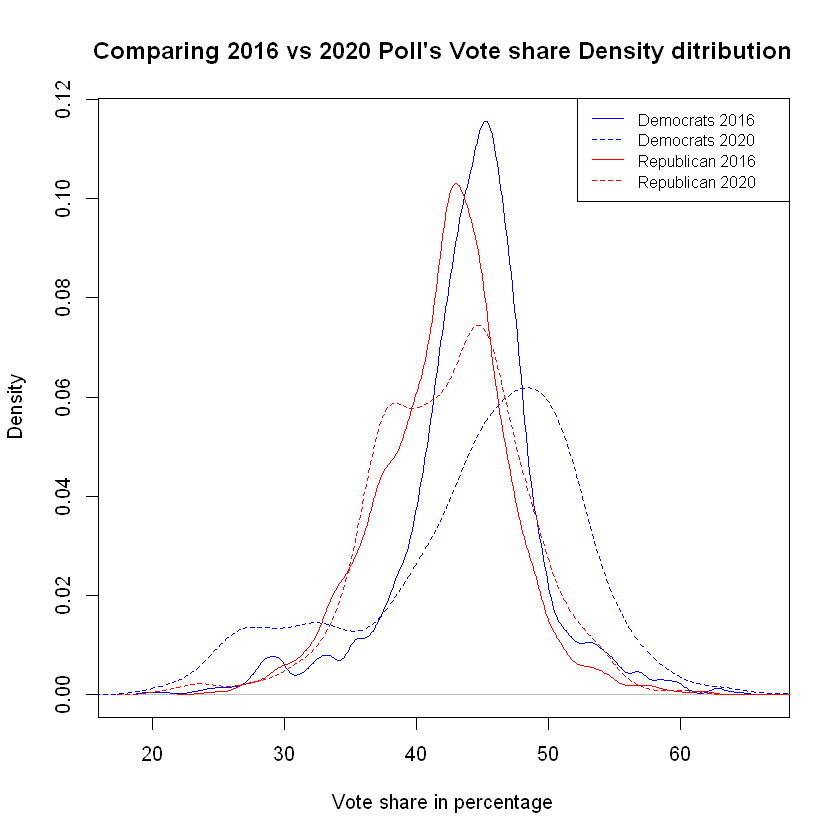

In [38]:

plot(density(polls2016ChoosenStates$adjpoll_clinton),
     type = "l",
     col = "blue", 
     xlab = "Vote share in percentage", 
     main = "Comparing 2016 vs 2020 Poll's Vote share Density ditribution")

lines(density(polls2016ChoosenStates$adjpoll_trump),
      type = "l",
      col = "red")

lines(density(polls2020ChoosenStates$DEM),
      type = "l",
      lty = 2,
      col = "blue")

lines(density(polls2020ChoosenStates$REP),
      type = "l",
      lty = 2,
      col = "red")

legend("topright", legend=c("Democrats 2016","Democrats 2020", "Republican 2016", "Republican 2020"),
       col=c("blue", "blue", "red", "red"), lty=c(1,2,1,2), cex=0.8)

## <font color=#304073><u><center>Hypothesis Testing</center></u></font>

### <font color=#4a4c52>With the current republican government under scrutiny since the begining of its term, we want to validate our assumption  that republican vote share is dropping in both red and blue states.</font>
> ### <font color=#4a4c52>In order to validate our hypothesis, 2 sample t-test seems to be the best alternative. For following reason we have choosen t-statisitc as our validation criterion:</font>
> ### 1. <font color=#4a4c52>We are unaware of the population standard deviation.</font>
> ### 2. <font color=#4a4c52>The two samples are independent. The values in one sample does not reveal the information about the other sample since the indivduals participating in these polls cannot remain same.</font>

### <font color=#4a4c52><u>Assumption one</u>:</font>
> #### <font color=#4a4c52><u>Null hypothesis</u>: Republican votes share is unaffected in a state.</font>
> #### <font color=#4a4c52><u>Alternate hypothesis</u>: Republican vote share has decreased in a state.</font>
### <font color=#4a4c52><u>Assumption two</u>:</font>
> #### <font color=#4a4c52><u>Null hypothesis</u>: Democrat votes share is unaffected in a state.</font>
> #### <font color=#4a4c52><u>Alternate hypothesis</u>: Democrat vote share has increased in a state.</font>

### <font color=#4a4c52><u>Performing single tail two sample hypothesis test for each state with polling data avaialble from 2016 and present.</u></font>

In [39]:
tTestResult <- data.frame(matrix(ncol = 5, nrow = 0))
colnames(tTestResult) <- c("state_code",
                           "state",
                           "winner_2016",
                           "Democratic_vote_share_increase",
                           "Republican_vote_share_decrease")
for (row in 1:nrow(statesChosen)){
    state_cd  <- statesChosen[row, "state_code"]
    state  <- statesChosen[row, "state"]
    winner2016  <- statesChosen[row, "winning_party"]
    demVoteShareIncrease <- ""
    repVoteShareDecrease <- ""
    if (winner2016 == "DEM"){
        print(paste(state, "was a Democratic state in 2016."))
    }else{
        print(paste(state, "was a Republican state in 2016."))
    }
    varianceDem <- var.test(x = polls2016ChoosenStates$adjpoll_clinton[polls2016ChoosenStates$state_code == state_cd],
                         y = polls2020ChoosenStates$DEM[polls2020ChoosenStates$state_code == state_cd])
    varianceDemPvalue  <- varianceDem$p.value

    varianceRep <- var.test(x = polls2016ChoosenStates$adjpoll_trump[polls2016ChoosenStates$state_code == state_cd],
                         y = polls2020ChoosenStates$REP[polls2020ChoosenStates$state_code == state_cd])
    varianceRepPvalue  <- varianceRep$p.value
    if (varianceDemPvalue > 0.05){
        print("   Collecting test statistic for two sample t-test for equal variance")
        print(paste("      Null hypothesis: Democrat vote share is unchanged in", state))
        print(paste("      Alternate hypothesis: Democrat vote share has increased in", state))
        tStatisticDem <- t.test(x = polls2016ChoosenStates$adjpoll_clinton[polls2016ChoosenStates$state_code == state_cd], 
                             y = polls2020ChoosenStates$DEM[polls2020ChoosenStates$state_code == state_cd],
                             alternative = "less",
                             var.equal = TRUE)

    }else{
        print("   Collecting test statistic for two sample t-test for unequal variance")
        print(paste("      Null hypothesis: Democrat vote share is unchanged in", state))
        print(paste("      Alternate hypothesis: Democrat vote share has increased in", state))
        tStatisticDem <- t.test(x = polls2016ChoosenStates$adjpoll_clinton[polls2016ChoosenStates$state_code == state_cd], 
                             y = polls2020ChoosenStates$DEM[polls2020ChoosenStates$state_code == state_cd],
                             alternative = "less",
                             var.equal = FALSE)            
    }
    pValueDem <- tStatisticDem$p.value
    if(pValueDem > 0.05){
        print("         We fail to reject the null hypothesis")
        demVoteShareIncrease <- "Y"
    }else{
        print("         Null hypothesis is rejected")
        demVoteShareIncrease <- "N"
    }
    if (varianceRepPvalue > 0.05){ 
        print("   Collecting test statistic for two sample t-test for equal variance")
        print(paste("      Null hypothesis: Republican vote share is unchanged in", state))
        print(paste("      Alternate hypothesis: Republican vote share has decreased in", state))
        tStatisticRep <- t.test(x = polls2016ChoosenStates$adjpoll_clinton[polls2016ChoosenStates$state_code == state_cd], 
                             y = polls2020ChoosenStates$DEM[polls2020ChoosenStates$state_code == state_cd],
                             alternative = "greater",
                             var.equal = TRUE)
    }else{
        print("   Collecting test statistic for two sample t-test for unequal variance")
        print(paste("      Null hypothesis: Republican vote share is unchanged in", state))
        print(paste("      Alternate hypothesis: Republican vote share has decreased in", state))
        tStatisticRep <- t.test(x = polls2016ChoosenStates$adjpoll_clinton[polls2016ChoosenStates$state_code == state_cd], 
                      y = polls2020ChoosenStates$DEM[polls2020ChoosenStates$state_code == state_cd],
                      alternative = "greater",
                      var.equal = FALSE)
    }
    pValueRep <- tStatisticRep$p.value
    if(pValueRep > 0.05){
        print("         We fail to reject the null hypothesis")
        repVoteShareDecrease <-  "N"
    }else{
        print("         Null hypothesis is rejected")
        repVoteShareDecrease <-  "Y"
    }
    
    tTestResult <- tTestResult %>%
    add_row(state_code = state_cd, 
            state = state, 
            winner_2016 = winner2016, 
            Democratic_vote_share_increase = demVoteShareIncrease , 
            Republican_vote_share_decrease = repVoteShareDecrease)
}


[1] "All States was a Republican state in 2016."
[1] "   Collecting test statistic for two sample t-test for unequal variance"
[1] "      Null hypothesis: Democrat vote share is unchanged in All States"
[1] "      Alternate hypothesis: Democrat vote share has increased in All States"
[1] "         We fail to reject the null hypothesis"
[1] "   Collecting test statistic for two sample t-test for unequal variance"
[1] "      Null hypothesis: Republican vote share is unchanged in All States"
[1] "      Alternate hypothesis: Republican vote share has decreased in All States"
[1] "         Null hypothesis is rejected"
[1] "Ohio was a Republican state in 2016."
[1] "   Collecting test statistic for two sample t-test for equal variance"
[1] "      Null hypothesis: Democrat vote share is unchanged in Ohio"
[1] "      Alternate hypothesis: Democrat vote share has increased in Ohio"
[1] "         Null hypothesis is rejected"
[1] "   Collecting test statistic for two sample t-test for equal varia

In [40]:
tTestResult

state_code,state,winner_2016,Democratic_vote_share_increase,Republican_vote_share_decrease
US,All States,REP,Y,Y
OH,Ohio,REP,N,N
NC,North Carolina,REP,Y,N
NH,New Hampshire,DEM,N,N
TX,Texas,REP,N,N
MI,Michigan,REP,N,N
IA,Iowa,REP,N,N
AZ,Arizona,REP,Y,N
SC,South Carolina,REP,Y,N
MN,Minnesota,DEM,N,N


### <font color=#4a4c52>Visualizing count of states where republican vote share may decrease or democrat vote share may increase</font>

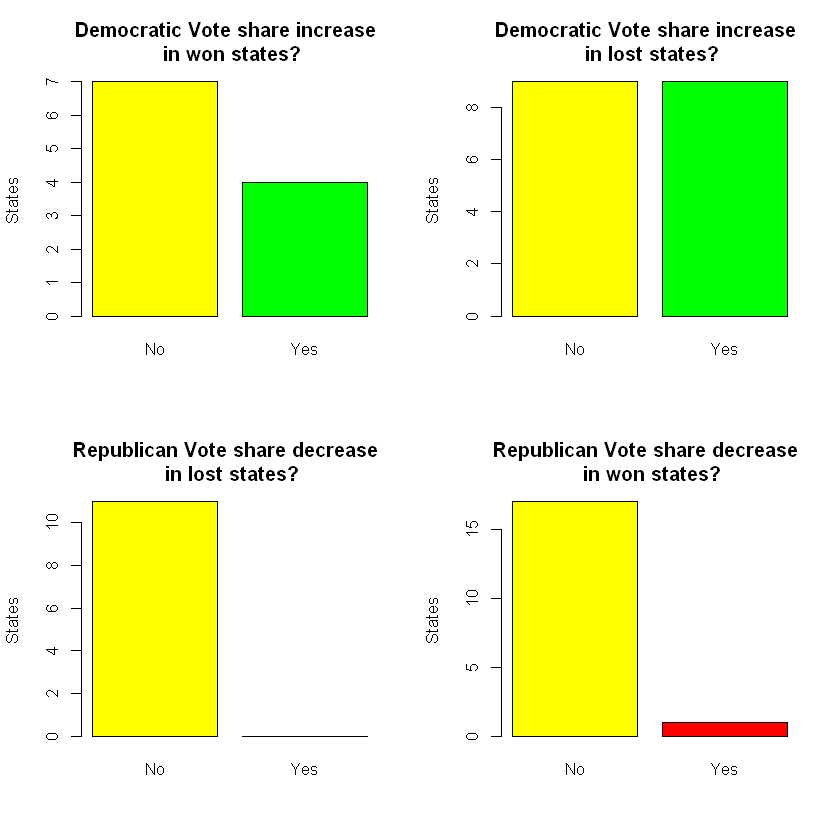

In [41]:
par(mfrow = c(2,2))
barplot(table(tTestResult$Democratic_vote_share_increase[tTestResult$winner_2016 == "DEM"]), 
        main = "Democratic Vote share increase \n in won states?",
        names.arg = c("No","Yes"),
        ylab = "States",
        col = c("yellow", "green"),)
barplot(table(tTestResult$Democratic_vote_share_increase[tTestResult$winner_2016 == "REP"]),
        main = "Democratic Vote share increase \n in lost states?",
        names.arg = c("No","Yes"),
        ylab = "States",
        col = c("yellow", "green"),)
barplot(table(factor(tTestResult$Republican_vote_share_decrease[tTestResult$winner_2016 == "DEM"], level = c("N","Y"))),
        main = "Republican Vote share decrease \n in lost states?",
        names.arg = c("No","Yes"),
        ylab = "States",
        col = c("yellow", "red"),)        
barplot(table(tTestResult$Republican_vote_share_decrease[tTestResult$winner_2016 == "REP"]),
        main = "Republican Vote share decrease \n in won states?",
        names.arg = c("No","Yes"),
        ylab = "States",
        col = c("yellow", "red"),)          

## <font color=#4a4c52>Conclusion</font>

### <font color=#4a4c52>Republican vote share didnt see a negative impact in last 3 years. 
### <font color=#4a4c52>Democrats might see a better vote share in the upcoming election. 
### <font color=#4a4c52>These hypothesis test are inconclusive to draw an insight whether their might be a change of government in 2020.

### <center>***********</center>